In [1]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import polars as pl

In [2]:
data_path = 'data/uk-crime/'

In [3]:
outcome_files = glob(os.path.join(os.getcwd(), data_path, '*', '*outcomes.csv'))

In [4]:
len(outcome_files)

1508

In [7]:
df_outcome = pl.concat(map(pl.read_csv, outcome_files))

ShapeError: unable to vstack, dtypes for column "Longitude" don't match: `f64` and `str`

In [5]:
df_outcome = pd.concat(map(pd.read_csv, outcome_files))
df_outcome

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,851ac53841d89ab2cfc4ccdcb543aecd84e9d173b147eb...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
1,d40611fb62cdf2548679c61afd7d501c14fa5e8349823f...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
2,d0a9089d1f3624f9acf3af80f87ac371d3d59db96b3694...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
3,9f82bf249db1e219d8135f3d297c62b0ca81cbf8ec0e04...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
4,d9e2f004392c8f46a988f1409be684582f5df40bb44f24...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
3595,9bcc03f251f9b031904f80bf2addb8c8c124ee85539b93...,2023-01,Wiltshire Police,Wiltshire Police,-1.756233,51.561152,On or near Frobisher Drive,E01015572,Swindon 016B,Unable to prosecute suspect
3596,6c2d9486b0fcf6c7dd568fb2d04306d4e3468cd378c777...,2023-01,Wiltshire Police,Wiltshire Police,-1.848971,51.488063,On or near Norborne Road,E01031884,Wiltshire 012E,Unable to prosecute suspect
3597,80e2338fa2c3af94d10ffac27a977866288b810671f7c2...,2023-01,Wiltshire Police,Wiltshire Police,-2.141712,51.362075,On or near Telford Drive,E01032070,Wiltshire 021D,Unable to prosecute suspect
3598,eb09d0c9adc0604cfe4e29d04f70a29b4ad84565016349...,2023-01,Wiltshire Police,Wiltshire Police,-1.743332,51.562014,On or near Old School Court,E01015538,Swindon 016A,Unable to prosecute suspect


In [6]:
df_outcome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13314668 entries, 0 to 3599
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Crime ID      object 
 1   Month         object 
 2   Reported by   object 
 3   Falls within  object 
 4   Longitude     float64
 5   Latitude      float64
 6   Location      object 
 7   LSOA code     object 
 8   LSOA name     object 
 9   Outcome type  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ GB


In [7]:
df_outcome.isna().sum()/len(df_outcome) * 100

Crime ID        0.000000
Month           0.000000
Reported by     0.000000
Falls within    0.000000
Longitude       1.895481
Latitude        1.895481
Location        0.000000
LSOA code       1.895999
LSOA name       1.895999
Outcome type    0.000000
dtype: float64

In [7]:
df_outcome['Crime ID'].nunique()

12362622

In [24]:
df_outcome.dropna(inplace=True)

In [27]:
df_outcome.reset_index(drop=True)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,e919485de981566dcb9ad4c5956cd8a9df4fcdbbb4121c...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511333,51.475949,On or near MULBERRY GARDENS,E01014976,South Gloucestershire 026F,Unable to prosecute suspect
1,ef649d2296d90513fef48bf65adac7ab199725c941b036...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.902586,51.360319,On or near SHERPERDS WAY,E01032667,North Somerset 026C,Unable to prosecute suspect
2,628b6e8df09c78a3ae7d897e1344722e4609c3fe62af37...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.728708,51.142566,On or near Petrol Station,E01029047,Mendip 012A,Further action is not in the public interest
3,235129cbd9a52022e1325f415125fb180753da2e47f404...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.916264,51.362695,On or near TORRINGTON CRESCENT,E01014835,North Somerset 016C,Unable to prosecute suspect
4,67fcfafcfb2070e2f2ff781dcd8586d51875887579b589...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-3.461711,51.205977,On or near Theme/Adventure Park,E01029322,West Somerset 002A,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
13062217,9bcc03f251f9b031904f80bf2addb8c8c124ee85539b93...,2023-01,Wiltshire Police,Wiltshire Police,-1.756233,51.561152,On or near Frobisher Drive,E01015572,Swindon 016B,Unable to prosecute suspect
13062218,6c2d9486b0fcf6c7dd568fb2d04306d4e3468cd378c777...,2023-01,Wiltshire Police,Wiltshire Police,-1.848971,51.488063,On or near Norborne Road,E01031884,Wiltshire 012E,Unable to prosecute suspect
13062219,80e2338fa2c3af94d10ffac27a977866288b810671f7c2...,2023-01,Wiltshire Police,Wiltshire Police,-2.141712,51.362075,On or near Telford Drive,E01032070,Wiltshire 021D,Unable to prosecute suspect
13062220,eb09d0c9adc0604cfe4e29d04f70a29b4ad84565016349...,2023-01,Wiltshire Police,Wiltshire Police,-1.743332,51.562014,On or near Old School Court,E01015538,Swindon 016A,Unable to prosecute suspect


In [8]:
street_files = glob(os.path.join(os.getcwd(), data_path, '*', '*street.csv'))

In [10]:
df_street = pd.concat(map(pd.read_csv, street_files))
df_street

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d3dc12297836c17e2a1f70b7b17a4002adc070656dd1f2...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,NaN
1,ab8cb1c81b5fa1c4ec741cb907822bd18873e68832b245...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
2,a0715131ca28423cbd09722de2af87d46613967ed10403...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable,NaN
3,98164008d84763bd35064266539da77e4e0d6583e2a65e...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable,NaN
4,61be2a9421e9a9df0967aa167031d5b4559f97332e7597...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.534338,51.417697,On or near Scotland Lane,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4205,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,NaN
4206,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,NaN
4207,106e3cf76d345fd82004646074abe413b9b26af2aabb1f...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Shoplifting,Under investigation,NaN
4208,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,NaN


In [11]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18861545 entries, 0 to 4209
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 1.8+ GB


In [12]:
df_street.isna().sum()/len(df_street) * 100

Crime ID                  23.186271
Month                      0.000000
Reported by                0.000000
Falls within               0.000000
Longitude                  1.706377
Latitude                   1.706377
Location                   0.000000
LSOA code                  4.316359
LSOA name                  4.316359
Crime type                 0.000000
Last outcome category     24.785785
Context                  100.000000
dtype: float64

In [18]:
df_street[df_street['Crime ID'].isna()]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
6,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN
7,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.497767,51.420232,On or near Chandos Road,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN
22,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.506903,51.415355,On or near St Anne'S Avenue,E01014401,Bath and North East Somerset 001C,Anti-social behaviour,NaN
23,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.508988,51.414070,On or near Selworthy Close,E01014401,Bath and North East Somerset 001C,Anti-social behaviour,NaN
39,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.499963,51.413236,On or near The Labbott,E01014403,Bath and North East Somerset 002B,Anti-social behaviour,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4120,NaN,2023-01,Wiltshire Police,Wiltshire Police,-1.790118,51.066886,On or near Culver Street,E01032023,Wiltshire 059D,Anti-social behaviour,NaN
4121,NaN,2023-01,Wiltshire Police,Wiltshire Police,-1.792038,51.068499,On or near,E01032023,Wiltshire 059D,Anti-social behaviour,NaN
4164,NaN,2023-01,Wiltshire Police,Wiltshire Police,-2.081191,51.064348,On or near High Street,E01032030,Wiltshire 061C,Anti-social behaviour,NaN
4165,NaN,2023-01,Wiltshire Police,Wiltshire Police,-2.079112,51.066948,On or near Hill Close,E01032030,Wiltshire 061C,Anti-social behaviour,NaN


In [14]:
df_street.drop(['Context'], axis=1, inplace=True)

In [16]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18861545 entries, 0 to 4209
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
dtypes: float64(2), object(9)
memory usage: 1.7+ GB


In [21]:
df_street.dropna(inplace=True)

In [22]:
df_street

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,d3dc12297836c17e2a1f70b7b17a4002adc070656dd1f2...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable
1,ab8cb1c81b5fa1c4ec741cb907822bd18873e68832b245...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
2,a0715131ca28423cbd09722de2af87d46613967ed10403...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
3,98164008d84763bd35064266539da77e4e0d6583e2a65e...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
4,61be2a9421e9a9df0967aa167031d5b4559f97332e7597...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.534338,51.417697,On or near Scotland Lane,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution
...,...,...,...,...,...,...,...,...,...,...,...
4205,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4206,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4207,106e3cf76d345fd82004646074abe413b9b26af2aabb1f...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Shoplifting,Under investigation
4208,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


<Axes: >

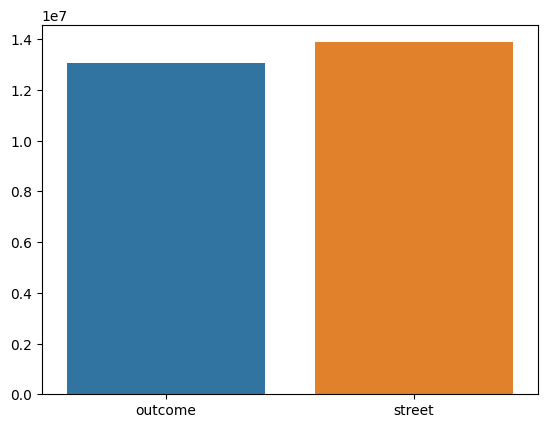

In [32]:
sns.barplot(y=[len(df_outcome), len(df_street)], x=['outcome', 'street'])

In [33]:
df_outcome.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')

In [34]:
df_street.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [51]:
len(df_street[df_street['Crime ID'].duplicated()])

152336

In [58]:
df_street[df_street['Crime ID'].duplicated()]['Crime ID'].iloc[1:7].values

array([], dtype=object)

In [57]:
df_street[df_street['Crime ID'] == 'be61f1b51fd28b52d0e7e05d4863df8848d5a2f87fe680bc901b004d8535f3d3']

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
937,be61f1b51fd28b52d0e7e05d4863df8848d5a2f87fe680...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.427727,51.31188,On or near Frederick Avenue,E01014445,Bath and North East Somerset 022E,Public order,Status update unavailable


In [56]:
df_outcome = df_outcome[~df_outcome['Crime ID'].duplicated()]
df_outcome

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
39,e919485de981566dcb9ad4c5956cd8a9df4fcdbbb4121c...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511333,51.475949,On or near MULBERRY GARDENS,E01014976,South Gloucestershire 026F,Unable to prosecute suspect
40,ef649d2296d90513fef48bf65adac7ab199725c941b036...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.902586,51.360319,On or near SHERPERDS WAY,E01032667,North Somerset 026C,Unable to prosecute suspect
110,628b6e8df09c78a3ae7d897e1344722e4609c3fe62af37...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.728708,51.142566,On or near Petrol Station,E01029047,Mendip 012A,Further action is not in the public interest
111,235129cbd9a52022e1325f415125fb180753da2e47f404...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.916264,51.362695,On or near TORRINGTON CRESCENT,E01014835,North Somerset 016C,Unable to prosecute suspect
112,67fcfafcfb2070e2f2ff781dcd8586d51875887579b589...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-3.461711,51.205977,On or near Theme/Adventure Park,E01029322,West Somerset 002A,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
3595,9bcc03f251f9b031904f80bf2addb8c8c124ee85539b93...,2023-01,Wiltshire Police,Wiltshire Police,-1.756233,51.561152,On or near Frobisher Drive,E01015572,Swindon 016B,Unable to prosecute suspect
3596,6c2d9486b0fcf6c7dd568fb2d04306d4e3468cd378c777...,2023-01,Wiltshire Police,Wiltshire Police,-1.848971,51.488063,On or near Norborne Road,E01031884,Wiltshire 012E,Unable to prosecute suspect
3597,80e2338fa2c3af94d10ffac27a977866288b810671f7c2...,2023-01,Wiltshire Police,Wiltshire Police,-2.141712,51.362075,On or near Telford Drive,E01032070,Wiltshire 021D,Unable to prosecute suspect
3598,eb09d0c9adc0604cfe4e29d04f70a29b4ad84565016349...,2023-01,Wiltshire Police,Wiltshire Police,-1.743332,51.562014,On or near Old School Court,E01015538,Swindon 016A,Unable to prosecute suspect


In [55]:
df_street = df_street[~df_street['Crime ID'].duplicated()]
df_street

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,d3dc12297836c17e2a1f70b7b17a4002adc070656dd1f2...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable
1,ab8cb1c81b5fa1c4ec741cb907822bd18873e68832b245...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
2,a0715131ca28423cbd09722de2af87d46613967ed10403...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
3,98164008d84763bd35064266539da77e4e0d6583e2a65e...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
4,61be2a9421e9a9df0967aa167031d5b4559f97332e7597...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.534338,51.417697,On or near Scotland Lane,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution
...,...,...,...,...,...,...,...,...,...,...,...
4205,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4206,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4207,106e3cf76d345fd82004646074abe413b9b26af2aabb1f...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Shoplifting,Under investigation
4208,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


In [59]:
def merge_clean(df1, df2, key):
    
    df_merged = pd.merge(df1, df2, how="inner", on = key)
    
    for col in df_merged.columns:
        if col.endswith("_x"):
            df_merged.rename(columns = lambda col:col.rstrip("_x"), inplace = True)
        elif col.endswith("_y"):
            to_drop = [col for col in df_merged if col.endswith("_y")]
            df_merged.drop(to_drop, axis = 1, inplace = True)
        else:
            pass
    return df_merged

In [60]:
df = merge_clean(df_street, df_outcome, "Crime ID")
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Outcome type
0,61be2a9421e9a9df0967aa167031d5b4559f97332e7597...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.534338,51.417697,On or near Scotland Lane,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution,Local resolution
1,1baef07c633366e3fd5a66572dea4b30040b8af835f0b9...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Further investigation is not in the public int...,Further investigation is not in the public int...
2,e4d24f3d1e4fe073c95a5d82d29b262b9afe7e7a25b225...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.499922,51.417373,On or near Further/Higher Educational Building,E01014400,Bath and North East Somerset 001B,Public order,Court result unavailable,Suspect charged
3,2202e600b5dfd7c0cd2d3d76192eaa8546f2aff41a8347...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.497938,51.418730,On or near The Avenue,E01014400,Bath and North East Somerset 001B,Violence and sexual offences,Unable to prosecute suspect,Unable to prosecute suspect
4,bbd7b4a56a0fd057d271b6b9ab9f52849e2fce5ae671a5...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.499922,51.417373,On or near Further/Higher Educational Building,E01014400,Bath and North East Somerset 001B,Violence and sexual offences,Further action is not in the public interest,Further action is not in the public interest
...,...,...,...,...,...,...,...,...,...,...,...,...
12128895,e5ad1fe3d37c380049cd9b41335af39a3b90efa87cca84...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Investigation complete; no suspect identified
12128896,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Investigation complete; no suspect identified
12128897,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Investigation complete; no suspect identified
12128898,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,Investigation complete; no suspect identified


In [62]:
len(df['LSOA code'].unique())

33465

In [64]:
os.getcwd()

'c:\\Users\\saqui\\Learning\\Projects\\workshop-crime'

In [69]:
os.path.join(os.getcwd(), data_path, 'clean/clean_data.csv')

'c:\\Users\\saqui\\Learning\\Projects\\workshop-crime\\data/uk-crime/clean/clean_data.csv'

In [71]:
df.to_csv('clean_data/clean_data.csv', index=False)